In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
df = pd.read_csv('tidy_data.csv')
df = df.drop(['Subject'], axis=1)

In [ ]:
print(f'Số lượng nhãn: {len(df.Activity.unique())}')
print(f'Số lượng thuộc tính: {len(df.columns)}')

Số lượng nhãn: 6
Số lượng thuộc tính: 80


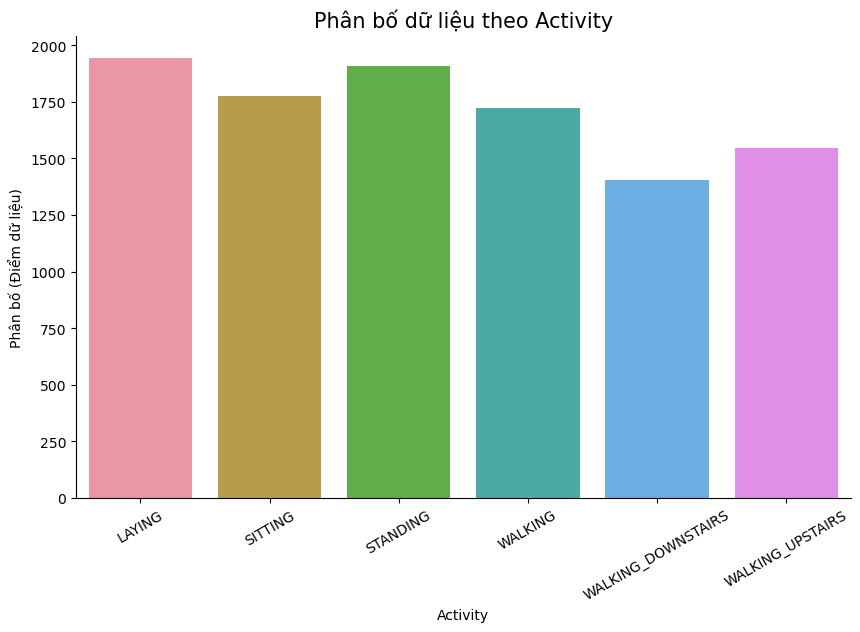

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines[['top', 'right']].set_visible(False)

df_activity_group = df.groupby(by='Activity').count().iloc[:, 0]
sns.barplot(x=df_activity_group.index, y=df_activity_group)
ax.set_title("Phân bố dữ liệu theo Activity", size=15)
ax.set_ylabel("Phân bố (Điểm dữ liệu)")
ax.tick_params(axis="x", rotation=30)
plt.show()

In [ ]:
#phan chia dữ liệu
X = df.drop(['Activity'], axis=1)
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cài đặt mô hình

In [ ]:
models = {}
predicts = {}

#### Sử dụng Cross Validation


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error

def train_with_cross_validation(model_name, n_splits=10, random_state=42):
    kf = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=random_state)
    avg_accuracy = []

    for train_index, test_index in kf.split(X_train, y_train):
        models[model_name].fit(X_train, y_train)

        y_pred = models[model_name].predict(X_test)
        result = accuracy_score(y_test, y_pred)
        avg_accuracy.append(result)

### Huấn luyện 2 Mô hình

In [ ]:
# Khởi tạo
models['knn'] = KNeighborsClassifier()
models['svc'] = SVC()

# Huân luyện
train_with_cross_validation('knn')
train_with_cross_validation('svc')

# Dự đoán trên tập Test
predicts['knn'] = models['knn'].predict(X_test)
predicts['svc'] = models['svc'].predict(X_test)

In [ ]:
#So sánh kết quả dự đoán của 2 mô hình với thực tế
pd.concat([pd.DataFrame(predicts), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

,knn,svc,Activity
0,WALKING,WALKING,WALKING
1,LAYING,LAYING,LAYING
2,SITTING,STANDING,STANDING
3,STANDING,STANDING,STANDING
4,WALKING,WALKING,WALKING
...,...,...,...
2055,STANDING,STANDING,STANDING
2056,STANDING,STANDING,STANDING
2057,SITTING,SITTING,SITTING
2058,STANDING,STANDING,STANDING


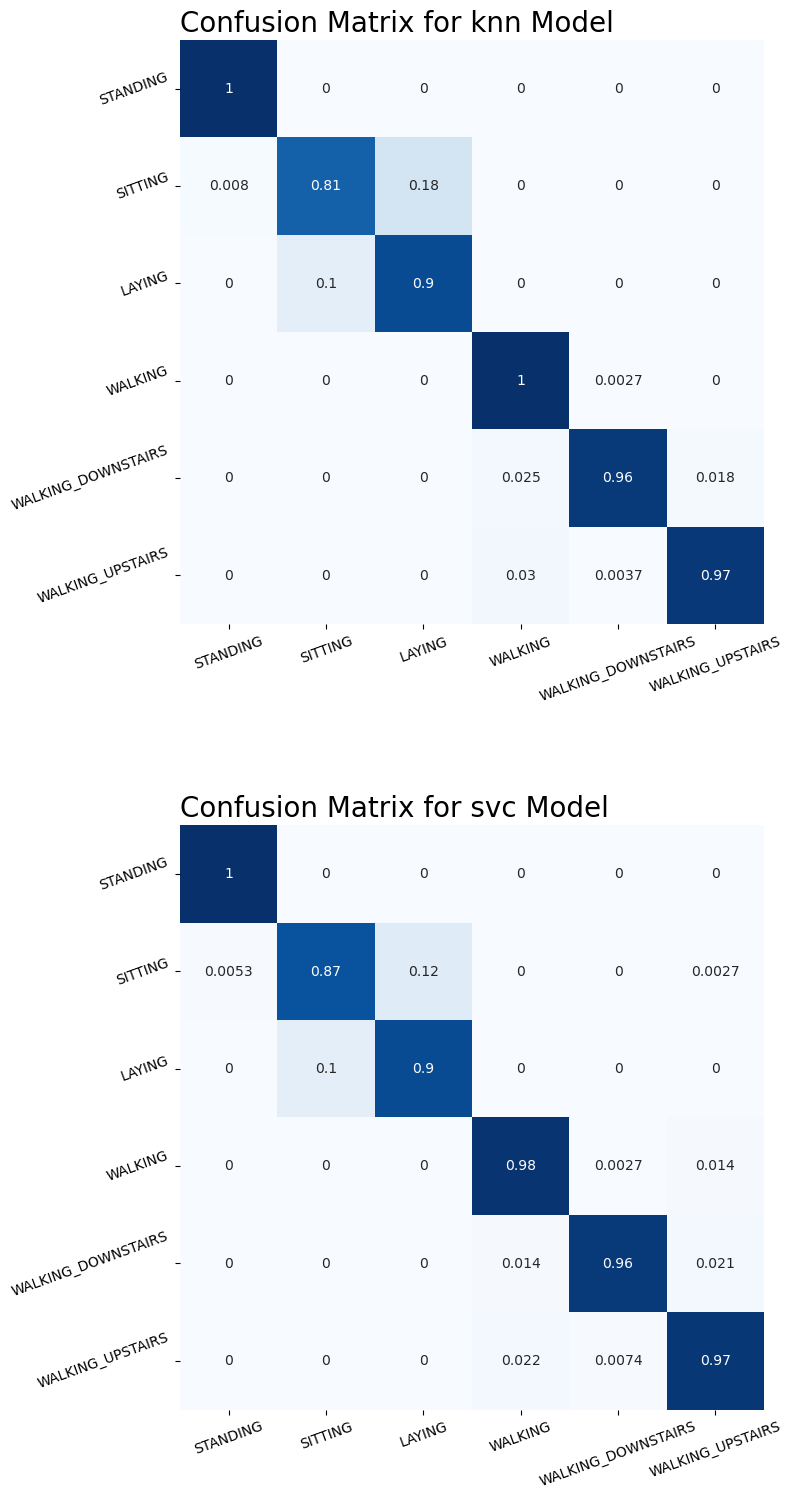

Độ chính xác của mô hình kNN: 93.6408
Độ chính xác của mô hình SVC: 94.7087


In [ ]:
#Đánh giá khả năng dự đoán của Mô hình
fig = plt.figure(figsize=(8, 16))
axes = [fig.add_subplot(2, 1, 1), fig.add_subplot(2, 1, 2)]
names = ['knn', 'svc']

for i in range(2):
    sns.heatmap(confusion_matrix(y_test, predicts[names[i]], normalize='true'),
                vmax=1,
                square=True,
                annot=True,
                cmap='Blues',
                ax=axes[i],
                cbar=False
               )

    axes[i].set_title(f'Confusion Matrix for {names[i]} Model', size=20, loc='left')
    axes[i].set_xticks([i+0.5 for i in range(6)], df.Activity.unique().tolist())
    axes[i].set_yticks([i+0.5 for i in range(6)], df.Activity.unique().tolist())
    axes[i].tick_params(axis='both', rotation=20)

    plt.tight_layout()
plt.show()

print(f'Độ chính xác của mô hình kNN: {accuracy_score(y_test, predicts["knn"])*100:.4f}')
print(f'Độ chính xác của mô hình SVC: {accuracy_score(y_test, predicts["svc"])*100:.4f}')

In [ ]:
#Thực hiện lại các bước
N_LOOP = 5
seeds = [np.random.randint(999) for _ in range(N_LOOP)]
accuracy = {
    'knn': [],
    'svc': [],
}

print(f'Thực hiện lặp: {N_LOOP} lần')
for loop in range(N_LOOP):
    print(f'- Lần lặp {loop+1} (Seed = {seeds[loop]})')

    # Khởi tạo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seeds[loop])
    models['knn'] = KNeighborsClassifier()
    models['svc'] = SVC()

    # Huấn luyện
    train_with_cross_validation('knn', random_state=seeds[loop])
    train_with_cross_validation('svc')

    # Dự đoán trên tập Test
    predicts['knn'] = models['knn'].predict(X_test)
    predicts['svc'] = models['svc'].predict(X_test)

    print(f'\t+ kNN Accuracy: {accuracy_score(y_test, predicts["knn"])*100:.4f}')
    print(f'\t+ SVC Accuracy: {accuracy_score(y_test, predicts["svc"])*100:.4f}')
    accuracy['knn'].append(accuracy_score(y_test, predicts["knn"])*100)
    accuracy['svc'].append(accuracy_score(y_test, predicts["svc"])*100)

print(pd.DataFrame(accuracy), "\n")

print(f'Avg. Accuracy sau 5 lần lặp của kNN: {np.array(accuracy["knn"]).mean():.4f}')
print(f'Avg. Accuracy sau 5 lần lặp của SVC: {np.array(accuracy["svc"]).mean():.4f}')

Thực hiện lặp: 5 lần
- Lần lặp 1 (Seed = 643)
	+ kNN Accuracy: 95.1942
	+ SVC Accuracy: 95.0000
- Lần lặp 2 (Seed = 694)
	+ kNN Accuracy: 93.6893
	+ SVC Accuracy: 94.0291
- Lần lặp 3 (Seed = 424)
	+ kNN Accuracy: 94.7573
	+ SVC Accuracy: 94.7087
- Lần lặp 4 (Seed = 113)
	+ kNN Accuracy: 94.4175
	+ SVC Accuracy: 94.6602
- Lần lặp 5 (Seed = 19)
	+ kNN Accuracy: 94.3689
	+ SVC Accuracy: 94.0777
         knn        svc
0  95.194175  95.000000
1  93.689320  94.029126
2  94.757282  94.708738
3  94.417476  94.660194
4  94.368932  94.077670 

Avg. Accuracy sau 5 lần lặp của kNN: 94.4854
Avg. Accuracy sau 5 lần lặp của SVC: 94.4951
